In [9]:
import numpy as np

# 加载 GloVe 词向量
def load_glove_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    print(f"Loaded {len(embeddings)} word vectors from GloVe.")
    return embeddings

# 获取动作标签的语义嵌入向量（平均池化）
def get_text_embedding(text, embeddings, dim=300):
    words = text.lower().split()
    vecs = []
    for word in words:
        if word in embeddings:
            vecs.append(embeddings[word])
        else:
            vecs.append(np.zeros(dim))  # OOV处理
            print(f"Warning: Word '{word}' not found in GloVe embeddings. Using zero vector.")
    if len(vecs) == 0:
        print(f"Warning: No valid words found in text '{text}'. Returning zero vector.")
        return np.zeros(dim)
    return np.mean(vecs, axis=0)

# # 示例使用
# if __name__ == "__main__":
#     glove_path = 'data/assembly101/glove/glove.6B.300d.txt'
#     embeddings = load_glove_embeddings(glove_path)

#     action_label = "shaking head"
#     embedding_vector = get_text_embedding(action_label, embeddings)
#     print(f"Embedding shape: {embedding_vector.shape}")
#     print(embedding_vector)  # 输出 X_q ∈ ℝ³⁰⁰


In [10]:
glove_path = '../data/assembly101/glove/glove.6B.300d.txt'
embeddings = load_glove_embeddings(glove_path)

Loaded 400000 word vectors from GloVe.


In [20]:
# 定义 CSV 文件路径
csv_file_path = '/home/fitz_joye/assembly101-action-recognition/TSM-action-recognition/data/assembly101/assembly101-annotations/coarse-annotations/actions.csv'  # 替换为实际文件路径

# 读取 CSV 文件
data = []
with open(csv_file_path, 'r', encoding='utf-8') as file:
    # 跳过表头
    header = file.readline().strip().split(',')
    for line in file:
        values = line.strip().split(',')
        data.append(dict(zip(header, values)))

# 打印解析后的数据
for row in data:
    print(row)
    break

{'action_id': '0', 'verb_id': '2', 'noun_id': '4', 'action_cls': 'inspect toy', 'verb_cls': 'inspect', 'noun_cls': 'toy'}


In [21]:
action_classes = set(row['action_cls'] for row in data)
verb_classes = set(row['verb_cls'] for row in data)
noun_classes = set(row['noun_cls'] for row in data)

In [22]:
action_dict = {}
for action in action_classes:
    action_dict[action] = get_text_embedding(action, embeddings)  
verb_dict = {}    
for verb in verb_classes:
    verb_dict[verb] = get_text_embedding(verb, embeddings)
noun_dict = {}
for noun in noun_classes:
    noun_dict[noun] = get_text_embedding(noun, embeddings)

In [23]:
action_embeddings = np.array(list(action_dict.values()))
verb_embeddings = np.array(list(verb_dict.values()))
noun_embeddings = np.array(list(noun_dict.values()))

Action 'detach connector' and 'detach arm connector' have similarity 0.85
Action 'detach connector' and 'attach connector' have similarity 0.81
Action 'detach connector' and 'unscrew arm connector' have similarity 0.71
Action 'detach connector' and 'attach arm connector' have similarity 0.71
Action 'unscrew interior' and 'detach interior' have similarity 0.73
Action 'detach hook' and 'detach tilter' have similarity 0.72
Action 'detach hook' and 'unscrew hook' have similarity 0.71
Action 'detach hook' and 'attach hook' have similarity 0.77
Action 'screw mixer stand' and 'attach mixer stand' have similarity 0.83
Action 'screw mixer stand' and 'detach mixer stand' have similarity 0.82
Action 'screw mixer stand' and 'unscrew mixer stand' have similarity 0.84
Action 'screw mixer stand' and 'attach mixer' have similarity 0.72
Action 'attach jackhammer' and 'attach tilter' have similarity 0.76
Action 'attach jackhammer' and 'attach jackhammer arm' have similarity 0.82
Action 'attach jackhamme

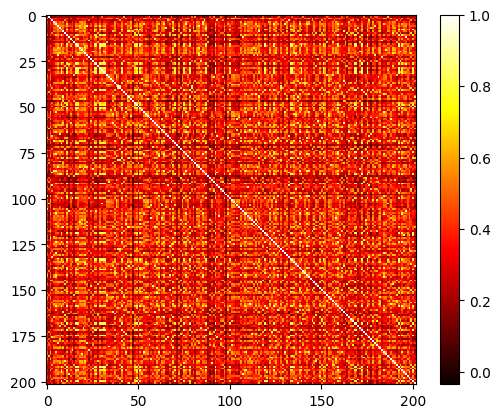

In [26]:
# 计算各个action_embeddings之间的余弦相似度
from sklearn.metrics.pairwise import cosine_similarity
action_similarity = cosine_similarity(action_embeddings)

# 绘制混淆矩阵
import matplotlib.pyplot as plt
plt.imshow(action_similarity, cmap='hot', interpolation='nearest')
plt.colorbar()

# 显示相似度大于0.5的条目名称
threshold = 0.7
for i in range(len(action_classes)):
    for j in range(i + 1, len(action_classes)):
        if action_similarity[i][j] > threshold:
            print(f"Action '{list(action_classes)[i]}' and '{list(action_classes)[j]}' have similarity {action_similarity[i][j]:.2f}")

Verb 'attempt to attach' and 'attempt to screw' have similarity 0.82
Verb 'attempt to attach' and 'attempt to detach' have similarity 0.89
Verb 'attempt to screw' and 'attempt to detach' have similarity 0.80


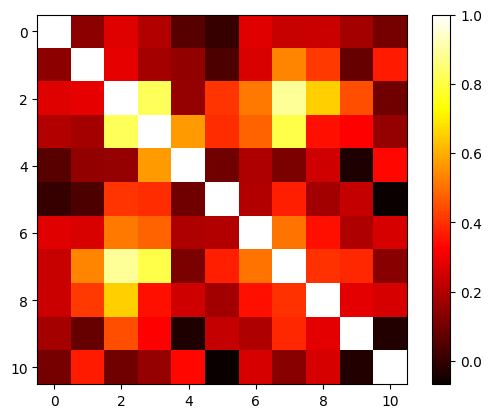

In [27]:
verb_similarity = cosine_similarity(verb_embeddings)
plt.imshow(verb_similarity, cmap='hot', interpolation='nearest')
plt.colorbar()

# 显示相似度大于0.5的条目名称
for i in range(len(verb_classes)):
    for j in range(i + 1, len(verb_classes)):
        if verb_similarity[i][j] > threshold:
            print(f"Verb '{list(verb_classes)[i]}' and '{list(verb_classes)[j]}' have similarity {verb_similarity[i][j]:.2f}")

Noun 'arm connector' and 'arm' have similarity 0.72
Noun 'arm connector' and 'connector' have similarity 0.77
Noun 'basket' and 'ladder basket' have similarity 0.76
Noun 'clamp arm' and 'arm' have similarity 0.76
Noun 'mixer stand' and 'mixer' have similarity 0.87
Noun 'cabin window' and 'cabin' have similarity 0.80
Noun 'cabin window' and 'cabin back' have similarity 0.76
Noun 'ladder basket' and 'ladder' have similarity 0.77
Noun 'engine' and 'engine cover' have similarity 0.84
Noun 'crane arm' and 'arm' have similarity 0.78
Noun 'crane arm' and 'excavator arm' have similarity 0.72
Noun 'arm' and 'jackhammer arm' have similarity 0.77
Noun 'arm' and 'bulldozer arm' have similarity 0.71
Noun 'arm' and 'roller arm' have similarity 0.74
Noun 'arm' and 'excavator arm' have similarity 0.78
Noun 'jackhammer arm' and 'bulldozer arm' have similarity 0.72
Noun 'jackhammer arm' and 'excavator arm' have similarity 0.75
Noun 'bulldozer arm' and 'excavator arm' have similarity 0.78
Noun 'turntable

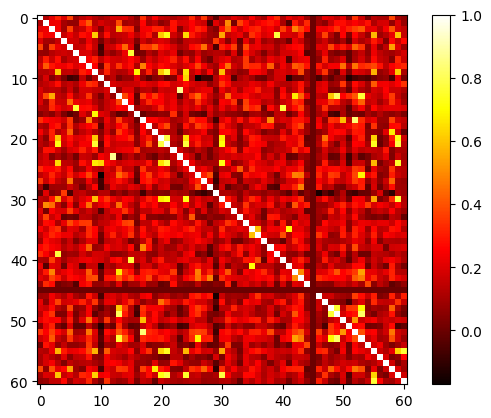

In [28]:
noun_similarity = cosine_similarity(noun_embeddings)
plt.imshow(noun_similarity, cmap='hot', interpolation='nearest')
plt.colorbar()
# 显示相似度大于0.5的条目名称
for i in range(len(noun_classes)):
    for j in range(i + 1, len(noun_classes)):
        if noun_similarity[i][j] > threshold:
            print(f"Noun '{list(noun_classes)[i]}' and '{list(noun_classes)[j]}' have similarity {noun_similarity[i][j]:.2f}")